In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

from imblearn.under_sampling import RandomUnderSampler



%matplotlib inline

In [5]:
data = pd.read_csv('creditcard.csv')
df = pd.DataFrame(data)

In [6]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


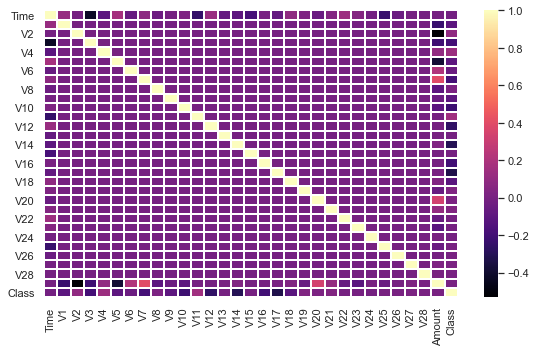

In [58]:
corr = df.corr() #gives matrix form
fig, ax = plt.subplots(figsize=(8, 5)) 

sns.heatmap(corr,  cmap='magma',linecolor='white',linewidths=1)
plt.tight_layout()

In [53]:
from sklearn import preprocessing
df.copy()['amount'] = preprocessing.StandardScaler().fit_transform(df.copy()['Amount'].values.reshape(-1, 1))
df.copy()['time'] = preprocessing.StandardScaler().fit_transform(df.copy()['Time'].values.reshape(-1, 1))



In [54]:
X = df.copy().drop('Class', axis=1)
y = df.copy()['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y)

c:\users\kashema\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


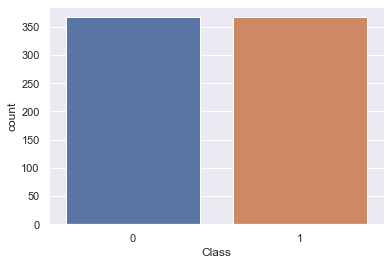

In [55]:
X, y = RandomUnderSampler().fit_resample(X_train, y_train)
# plot the new distribution
ax = sns.countplot(y)
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71077
           1       0.06      0.90      0.11       125

    accuracy                           0.98     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.98      0.99     71202

AUC is 0.936


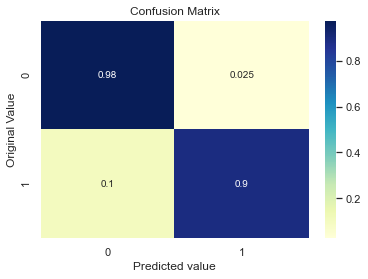

In [61]:

model = LogisticRegression(solver='liblinear', multi_class='ovr',random_state=0)
model.fit(X, y)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# ROC AUC score
print("AUC is {:.3f}".format(roc_auc_score(y_test, y_pred)))



# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'),cmap="YlGnBu", annot = True, ax=ax)

ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted value")
ax.set_ylabel("Original Value")


plt.show()


              precision    recall  f1-score   support

           0       1.00      0.89      0.94     71077
           1       0.01      0.98      0.03       125

    accuracy                           0.89     71202
   macro avg       0.51      0.93      0.48     71202
weighted avg       1.00      0.89      0.94     71202

AUC is 0.931


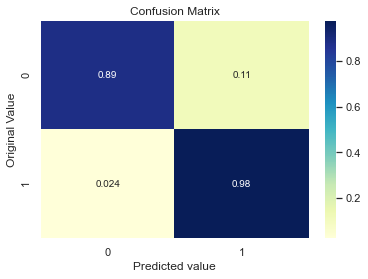

In [62]:
model = DecisionTreeClassifier()
model.fit(X, y)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# ROC AUC score
print("AUC is {:.3f}".format(roc_auc_score(y_test, y_pred)))



# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'),cmap="YlGnBu", annot = True, ax=ax)

ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted value")
ax.set_ylabel("Original Value")


plt.show()
